# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
password = pd.read_csv("passwords.csv")
password_nps = password["password"][0]
url_full = "https://developer.nps.gov/api/v1/roadevents?api_key=" + password_nps
#print(url_full)

In [3]:
#pull API using API key
response_API = requests.get(url_full)
print(response_API.status_code)
data = response_API.text
df = json.loads(data)

200


In [5]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [6]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [7]:
today_string

'2024-08-28'

In [8]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts']), max(park_df['number of alerts'])

(15, 62, 20, 20)

In [9]:
park_df.sort_values(by=['number of alerts'], ascending = False)

,park,number of alerts,date
2,Blue Ridge Parkway,20,2024-08-28
0,Crater Lake National Park,6,2024-08-28
4,Mojave National Preserve,4,2024-08-28
10,Great Smoky Mountains National Park,4,2024-08-28
1,Shenandoah National Park,4,2024-08-28
6,Buffalo National River,4,2024-08-28
11,Capitol Reef National Park,4,2024-08-28
9,Guadalupe Mountains National Park,2,2024-08-28
13,Black Canyon of the Gunnison National Park,2,2024-08-28
12,Curecanti National Recreation Area,2,2024-08-28


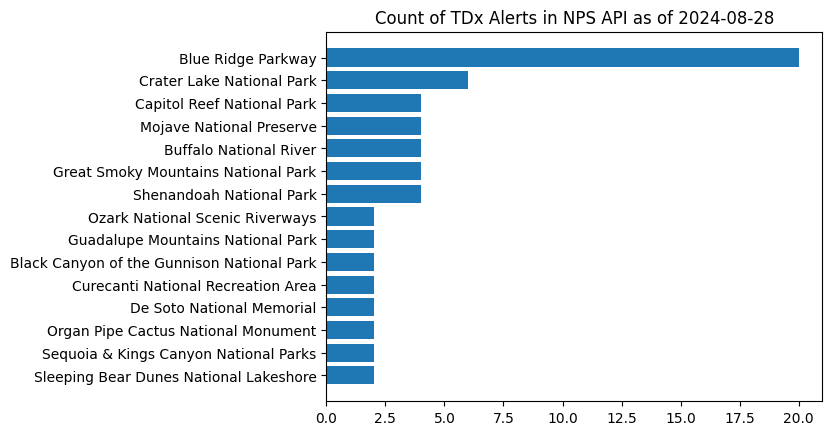

In [10]:
#create a quick summary figure


# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()


In [11]:
#import matplotlib.ticker as ticker
#import seaborn as sns 

#plt.style.use('seaborn')
#sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


#bar_labels = park_df['park']

#fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
#title = "Count of TDx Alerts in NPS API as of " + today_string
#ax.set_title(title, fontsize=34)

#bars = ax.barh(width = park_df['number of alerts'], y = bar_labels)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
#ax.tick_params(axis='x', which='major', labelsize=26)
#ax.tick_params(axis='y', which='major', labelsize=26)

#plt.xticks(range(1,max(park_df['number of alerts'])+1))

#for bar in bars:
#    width = bar.get_width() #Previously we got the height
#    label = '{:,}'.format(width)
#    label_y_pos = bar.get_y() + bar.get_height() / 2
#    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(18)



#plt.show()

In [12]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
id_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Alert ID: ", x['properties']['core_details']['data_source_id'])
  #  print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    id_list.append(x['properties']['core_details']['data_source_id'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  Ease Rim Drive Rehabilitation
Description:  East Rim Drive is closed from Skell Head to Phantom Ship Overlook for Year 2 of a major rehabilitation project.  Cloudcap Road is also closed. 
Event type:  work-zone
Road name:  ['East Rim Drive from Skell Head to Phantom Ship Overlook']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  Ease Rim Drive Rehabilitation
Description:  East Rim Drive is closed from Skell Head to Phantom Ship Overlook for Year 2 of a major rehabilitation project.  Cloudcap Road is also closed. 
Event type:  work-zone
Road name:  ['East Rim Drive from Skell Head to Phantom Ship Overlook']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  Ease Rim Drive Rehabilitation
Description:  East Rim Drive is closed from Skell Head to Phantom Ship Overlook for Year 2 of a major r

In [13]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "alert_id": id_list
#    "event end date": end_date_list
})
df_update.head

<bound method NDFrame.head of           date                                        park  \
0   2024-08-28                   Crater Lake National Park   
1   2024-08-28                   Crater Lake National Park   
2   2024-08-28                   Crater Lake National Park   
3   2024-08-28                   Crater Lake National Park   
4   2024-08-28                   Crater Lake National Park   
..         ...                                         ...   
57  2024-08-28          Curecanti National Recreation Area   
58  2024-08-28  Black Canyon of the Gunnison National Park   
59  2024-08-28  Black Canyon of the Gunnison National Park   
60  2024-08-28                   De Soto National Memorial   
61  2024-08-28                   De Soto National Memorial   

                                          alert name  \
0                      Ease Rim Drive Rehabilitation   
1                      Ease Rim Drive Rehabilitation   
2                      Ease Rim Drive Rehabilitation   
3

In [14]:
path = "Park Unit Scraping Information.csv"
regionlookup = pd.read_csv(path, encoding='latin-1')
regionlookup.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [15]:
regionlookup.rename(columns={'Park Full Name':"park", "Reg":"region","Alpha":"alpha"}, inplace = True)
region_subset = regionlookup[['park', 'region', 'alpha', "State"]]
region_subset.head

<bound method NDFrame.head of                                          park region alpha       State
0                          Alagnak Wild River    AKR  ALAG          AK
1    Aniakchak National Monument and Preserve    AKR  ANIA          AK
2        Bering Land Bridge National Preserve    AKR  BELA          AK
3          Cape Krusenstern National Monument    AKR  CAKR          AK
4           Denali National Park and Preserve    AKR  DENA          AK
..                                        ...    ...   ...         ...
425  Grand Canyon-Parashant National Monument    IMR  PARA          AZ
426                           Alcatraz Island    PWR  ALCA          CA
427       Natchez Trace National Scenic Trail    SER  NATT  AL, MS, TN
428                       Historic Jamestowne    NER  JAME          VA
429                Death Valley National Park    PWR  DEVA      CA, NV

[430 rows x 4 columns]>

In [16]:
merged_df = pd.merge(df_update, region_subset, on="park", how="inner")
merged_df.head

<bound method NDFrame.head of           date                                        park  \
0   2024-08-28                   Crater Lake National Park   
1   2024-08-28                   Crater Lake National Park   
2   2024-08-28                   Crater Lake National Park   
3   2024-08-28                   Crater Lake National Park   
4   2024-08-28                   Crater Lake National Park   
5   2024-08-28                   Crater Lake National Park   
6   2024-08-28                    Shenandoah National Park   
7   2024-08-28                    Shenandoah National Park   
8   2024-08-28                    Shenandoah National Park   
9   2024-08-28                    Shenandoah National Park   
10  2024-08-28                          Blue Ridge Parkway   
11  2024-08-28                          Blue Ridge Parkway   
12  2024-08-28                          Blue Ridge Parkway   
13  2024-08-28                          Blue Ridge Parkway   
14  2024-08-28                          

In [17]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [18]:
df_update = pd.concat([merged_df, df_old_update])
df_update.head

<bound method NDFrame.head of             date                       park  \
0     2024-08-28  Crater Lake National Park   
1     2024-08-28  Crater Lake National Park   
2     2024-08-28  Crater Lake National Park   
3     2024-08-28  Crater Lake National Park   
4     2024-08-28  Crater Lake National Park   
...          ...                        ...   
2472   4/29/2024         Zion National Park   
2473    5/2/2024         Zion National Park   
2474    5/2/2024         Zion National Park   
2475    5/8/2024         Zion National Park   
2476    5/8/2024         Zion National Park   

                                            alert name  \
0                        Ease Rim Drive Rehabilitation   
1                        Ease Rim Drive Rehabilitation   
2                        Ease Rim Drive Rehabilitation   
3                        Ease Rim Drive Rehabilitation   
4                North Entrance Road Temporary Closure   
...                                                ...   

In [19]:
df_update.shape

(2537, 12)

In [20]:
df_update.columns

Index(['date', 'park', 'alert name', 'description', 'event type', 'road name',
       'vehicle impact', 'event start date', 'alert_id', 'region', 'alpha',
       'State'],
      dtype='object')

In [21]:
df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()



,park,date,alert name,number of alerts,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,Muir Woods National Monument,1,1,1,1,1,1,1,1,1,1,1
1,Big Bend National Park,2,2,2,2,2,2,2,2,2,2,2
2,Pinnacles National Park,2,2,2,2,2,2,2,2,2,2,2
3,Valley Forge National Historical Park,2,2,2,2,2,2,2,2,2,2,2
4,Piscataway Park,4,4,4,4,4,4,4,2,4,4,4
5,Fort Point National Historic Site,5,5,5,5,5,5,5,5,5,5,5
6,Golden Gate National Recreation Area,6,6,6,6,6,6,6,4,6,6,6
7,Acadia National Park,7,7,7,7,7,7,7,7,7,7,7
8,Point Reyes National Seashore,10,10,10,10,10,10,10,8,10,10,10
9,Padre Island National Seashore,10,10,10,10,10,10,10,8,10,10,10


In [22]:
df_update_agg = df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()


In [23]:
#import matplotlib.ticker as ticker
#import seaborn as sns 

#plt.style.use('seaborn')
#sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


#bar_labels = df_update_agg['park']

#fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
#title = "Count of TDx Alerts in NPS API as of " + today_string
#ax.set_title(title, fontsize=34)

#bars = ax.barh(width = df_update_agg['number of alerts'], y = bar_labels)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
#ax.tick_params(axis='x', which='major', labelsize=26)
#ax.tick_params(axis='y', which='major', labelsize=26)

#plt.xticks(range(1,max(df_update_agg['number of alerts'])+1))

#for bar in bars:
#    width = bar.get_width() #Previously we got the height
#    label = '{:,}'.format(width)
#    label_y_pos = bar.get_y() + bar.get_height() / 2
#    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(18)



#plt.show()

In [24]:
df_update.shape, merged_df.shape

((2537, 12), (60, 12))

In [25]:
null_region_count = merged_df['region'].isnull().sum()
null_region_count

np.int64(0)

In [26]:
if null_region_count == 0:
    df_update.to_csv("./TDx_tracker.csv", index=False)
else:
    null_region_rows = joined[joined['region'].isnull()]
    print("Rows with a null Region column:")
    print(null_region_rows)